In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Churn-Dataset.csv')

In [22]:
data.shape

(7043, 23)

In [18]:
data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
for i in data.columns:
  if data[i].dtype == 'object':
    print(i, data[i].unique(), '\n')

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 

gender ['Female' 'Male'] 

Partner ['Yes' 'No'] 

Dependents ['No' 'Yes'] 

PhoneService ['No' 'Yes'] 

MultipleLines ['No phone service' 'No' 'Yes'] 

InternetService ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity ['No' 'Yes' 'No internet service'] 

OnlineBackup ['Yes' 'No' 'No internet service'] 

DeviceProtection ['No' 'Yes' 'No internet service'] 

TechSupport ['No' 'Yes' 'No internet service'] 

StreamingTV ['No' 'Yes' 'No internet service'] 

StreamingMovies ['No' 'Yes' 'No internet service'] 

Contract ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling ['Yes' 'No'] 

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5'] 

Churn ['No' 'Yes'] 



In [10]:
data['MultipleLines'].replace({'No phone service': 'No'}, inplace=True)
data['OnlineSecurity'].replace({'No internet service': 'No'}, inplace=True)
data['OnlineBackup'].replace({'No internet service': 'No'}, inplace=True)
data['DeviceProtection'].replace({'No internet service': 'No'}, inplace=True)
data['TechSupport'].replace({'No internet service': 'No'}, inplace=True)
data['StreamingTV'].replace({'No internet service': 'No'}, inplace=True)
data['StreamingMovies'].replace({'No internet service': 'No'}, inplace=True)

In [16]:
count = sum(1 for i in data['TotalCharges'] if ' ' in i)
count

11

In [21]:
data[data['TotalCharges'] == ' '].shape

(11, 23)

In [23]:
data.drop(data[data['TotalCharges'] == ' '].index, inplace=True)

In [24]:
data['TotalCharges'] = data['TotalCharges'].astype('float')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [26]:
data.shape

(7032, 23)

In [27]:
data.to_csv('cleaned_churn_data.csv', index=False)

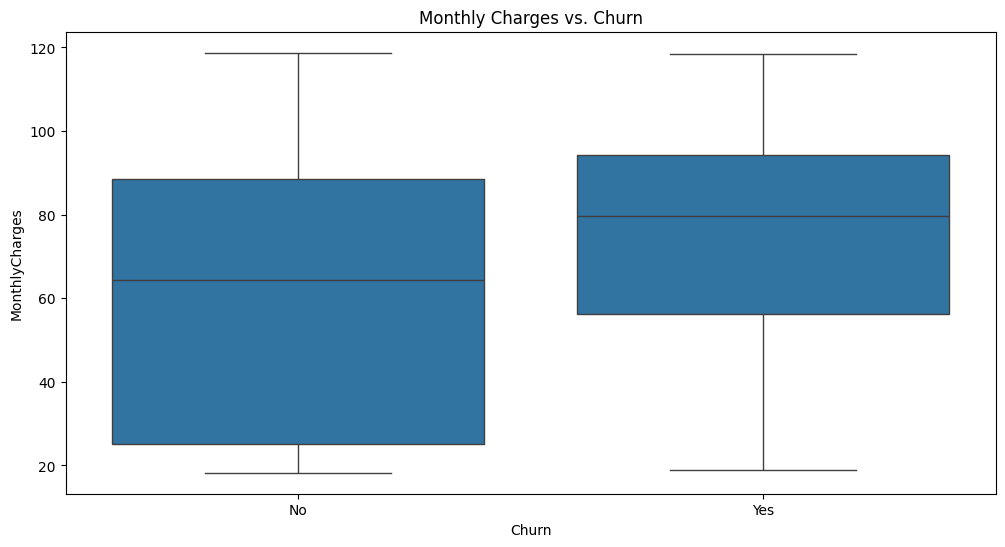

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges vs. Churn')
plt.show()

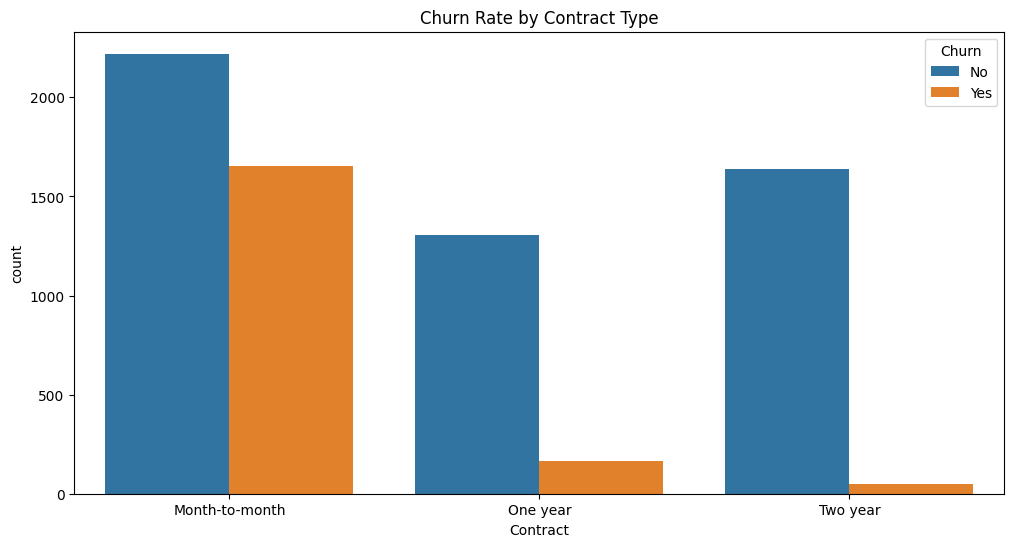

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn Rate by Contract Type')
plt.show()